# Projet ML

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset classification

Immunotherapy Dataset

Link:
https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset?fbclid=IwAR3UvWjj_2qqoS-_bjMEWCnrSUNS-1LezCZk1G6yMLHf_lAbpO4DZ76VZO0

In [2]:
#Open the dataset with read_excel()
df = pd.read_excel("Immunotherapy.xlsx")

In [3]:
#Rename the features 
df.rename(
    columns={
        "sex": "Sex", 
        "age": "Age", 
        "Number_of_Warts": "Nbr_Warts",
        "induration_diameter": "Induration_diameter",
        "Result_of_Treatment": "Result", 
    },
    inplace = True
)

In [4]:
df

,Sex,Age,Time,Nbr_Warts,Type,Area,Induration_diameter,Result
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


In [5]:
# Data types of our dataframe
df.dtypes

Sex                      int64
Age                      int64
Time                   float64
Nbr_Warts                int64
Type                     int64
Area                     int64
Induration_diameter      int64
Result                   int64
dtype: object

## Graphic Representation


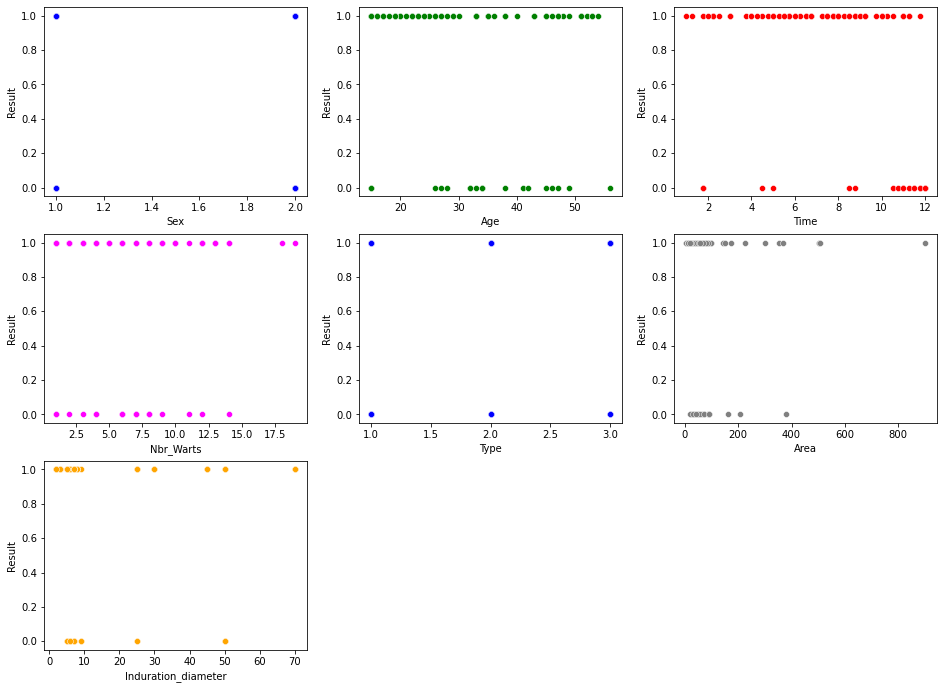

In [6]:
# Scatter plot of each feature
fig = plt.figure(figsize=(16,16))

plt.subplot(431)
sns.scatterplot(data = df, x = 'Sex', y = 'Result', color='blue')

plt.subplot(432)
sns.scatterplot(data = df, x = 'Age', y = 'Result', color='green')

plt.subplot(433)
sns.scatterplot(data = df, x = 'Time', y = 'Result', color='red')

plt.subplot(434)
sns.scatterplot(data = df, x = 'Nbr_Warts', y = 'Result', color='magenta')

plt.subplot(435)
sns.scatterplot(data = df, x = 'Type', y = 'Result', color='blue')

plt.subplot(436)
sns.scatterplot(data = df, x = 'Area', y = 'Result', color='gray')

plt.subplot(437)
sns.scatterplot(data = df, x = 'Induration_diameter', y = 'Result', color='orange');


In [7]:
# Pairwise Correlation of the features
df.corr()

,Sex,Age,Time,Nbr_Warts,Type,Area,Induration_diameter,Result
Sex,1.000000,0.043682,-0.014825,0.100785,-0.104623,-0.115664,0.015202,0.018831
Age,0.043682,1.000000,0.188981,0.000092,-0.056636,-0.064334,-0.007005,-0.188314
Time,-0.014825,0.188981,1.000000,0.050800,-0.262870,-0.047254,-0.183656,-0.361172
Nbr_Warts,0.100785,0.000092,0.050800,1.000000,0.148047,-0.107528,0.062383,-0.047160
Type,-0.104623,-0.056636,-0.262870,0.148047,1.000000,-0.042080,0.205546,0.083396
Area,-0.115664,-0.064334,-0.047254,-0.107528,-0.042080,1.000000,0.119262,0.043349
Induration_diameter,0.015202,-0.007005,-0.183656,0.062383,0.205546,0.119262,1.000000,-0.031273
Result,0.018831,-0.188314,-0.361172,-0.047160,0.083396,0.043349,-0.031273,1.000000


# I- Preprocessing


# I.1- Missing values 

We use the command df.isna().sum() to check if there are any missing values  


In [8]:
df.isna().sum()
# All the values are equal to zero, so there are no missing values

Sex                    0
Age                    0
Time                   0
Nbr_Warts              0
Type                   0
Area                   0
Induration_diameter    0
Result                 0
dtype: int64

# I.2- Removing Categorical values 

The features 'Sex' and 'Type' are of Categorical type, we have to transform them to a numerical type


In [9]:
df.columns

Index(['Sex', 'Age', 'Time', 'Nbr_Warts', 'Type', 'Area',
       'Induration_diameter', 'Result'],
      dtype='object')

In [10]:
# We use the 'Dummies' method:
dummies_Type = pd.get_dummies(df['Type'], prefix='Type', dummy_na=False)
dummies_Sex  = pd.get_dummies(df['Sex'], prefix='Sex', dummy_na=False)

In [11]:
print(dummies_Type.head(5))

   Type_1  Type_2  Type_3
0       0       0       1
1       0       0       1
2       1       0       0
3       0       0       1
4       1       0       0


In [12]:
dummies_Sex.rename(
    columns={
        "Sex_1": "Sex_M", 
        "Sex_2": "Sex_F", 
    },
    inplace = True
)

In [13]:
print(dummies_Sex.head(5))

   Sex_M  Sex_F
0      1      0
1      1      0
2      1      0
3      1      0
4      1      0


In [14]:
df = df.drop('Sex', 1)

C:\Users\user\AppData\Local\Temp/ipykernel_5928/3401346393.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Sex', 1)


In [15]:
df.head(5)

,Age,Time,Nbr_Warts,Type,Area,Induration_diameter,Result
0,22,2.25,14,3,51,50,1
1,15,3.00,2,3,900,70,1
2,16,10.50,2,1,100,25,1
3,27,4.50,9,3,80,30,1
4,20,8.00,6,1,45,8,1


In [16]:
df = df.drop('Type', 1)

C:\Users\user\AppData\Local\Temp/ipykernel_5928/2018126150.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Type', 1)


In [17]:
df.head(5)

,Age,Time,Nbr_Warts,Area,Induration_diameter,Result
0,22,2.25,14,51,50,1
1,15,3.00,2,900,70,1
2,16,10.50,2,100,25,1
3,27,4.50,9,80,30,1
4,20,8.00,6,45,8,1


In [18]:
#We merge all the features 
df = pd.concat([dummies_Sex, df.Age, df.Time, df.Nbr_Warts, dummies_Type, df.Area, df.Induration_diameter, df.Result], axis=1)

In [19]:
df

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
0,1,0,22,2.25,14,0,0,1,51,50,1
1,1,0,15,3.00,2,0,0,1,900,70,1
2,1,0,16,10.50,2,1,0,0,100,25,1
3,1,0,27,4.50,9,0,0,1,80,30,1
4,1,0,20,8.00,6,1,0,0,45,8,1
...,...,...,...,...,...,...,...,...,...,...,...
85,1,0,40,5.50,8,0,0,1,69,5,1
86,1,0,38,7.50,8,0,1,0,56,45,1
87,1,0,46,11.50,4,1,0,0,91,25,0
88,1,0,32,12.00,9,1,0,0,43,50,0


# I.3- Detecting Outliers


In [20]:
#We use z_score method to detect the outliers: 
def detect_outliers(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std  = np.std(data)  
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    
    return outliers

In [21]:
detect_outliers(df['Nbr_Warts'])

[19]

In [22]:
detect_outliers(df['Area'])

[900, 504, 507]

In [23]:
detect_outliers(df['Induration_diameter'])

[70, 70, 70]

In [24]:
#The other features have been tested and they don't contain outliers
df_outliers = df[df['Nbr_Warts'] == 19].append(df[df['Area'] == 900]).append(df[df['Area'] == 504]).append(df[df['Area'] == 507]).append(df[df['Induration_diameter'] == 70])
df_outliers = df_outliers.drop_duplicates()
df_outliers = df_outliers.sort_index()
df_outliers

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
1,1,0,15,3.00,2,0,0,1,900,70,1
18,0,1,15,6.50,19,1,0,0,56,7,1
31,1,0,23,3.00,2,0,0,1,87,70,1
37,1,0,29,8.75,3,1,0,0,504,2,1
61,0,1,19,2.25,8,0,1,0,42,70,1
78,1,0,43,11.00,7,1,0,0,507,7,1


In [25]:
#Suppression of the outliers from the dataframe
df = df.drop(labels=[1,18,31,37,61,78], axis=0)
df.index = np.arange(0, len(df))
df

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
0,1,0,22,2.25,14,0,0,1,51,50,1
1,1,0,16,10.50,2,1,0,0,100,25,1
2,1,0,27,4.50,9,0,0,1,80,30,1
3,1,0,20,8.00,6,1,0,0,45,8,1
4,1,0,15,5.00,3,0,0,1,84,7,1
...,...,...,...,...,...,...,...,...,...,...,...
79,1,0,40,5.50,8,0,0,1,69,5,1
80,1,0,38,7.50,8,0,1,0,56,45,1
81,1,0,46,11.50,4,1,0,0,91,25,0
82,1,0,32,12.00,9,1,0,0,43,50,0


# I.4- Feature scaling


In [26]:
#To make all values of features between 0 and 1 we use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 
S = MinMaxScaler()
dfScale = S.fit_transform(df)
dfScale = pd.DataFrame(dfScale)
dfScale.columns = df.columns
dfScale = dfScale.astype(
                {"Sex_M": int, "Sex_F": int, "Type_1": int, "Type_2": int, "Type_3": int, "Result" : int}
                )
df = dfScale

In [27]:
df

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter,Result
0,1,0,0.170732,0.113636,0.764706,0,0,1,0.090726,1.000000,1
1,1,0,0.024390,0.863636,0.058824,1,0,0,0.189516,0.479167,1
2,1,0,0.292683,0.318182,0.470588,0,0,1,0.149194,0.583333,1
3,1,0,0.121951,0.636364,0.294118,1,0,0,0.078629,0.125000,1
4,1,0,0.000000,0.363636,0.117647,0,0,1,0.157258,0.104167,1
...,...,...,...,...,...,...,...,...,...,...,...
79,1,0,0.609756,0.409091,0.411765,0,0,1,0.127016,0.062500,1
80,1,0,0.560976,0.590909,0.411765,0,1,0,0.100806,0.895833,1
81,1,0,0.756098,0.954545,0.176471,1,0,0,0.171371,0.479167,0
82,1,0,0.414634,1.000000,0.470588,1,0,0,0.074597,1.000000,0


# II- Gradient Descent

In [203]:
#def of the input and output
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#spliting the dataset into training part, validation part and test part
from sklearn.model_selection import train_test_split

X_train, X_rest, Y_train, Y_rest = train_test_split(x,y,test_size=0.2,random_state=0)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_rest,Y_rest,test_size=0.5,random_state=0)

In [204]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(67, 10)
(8, 10)
(9, 10)


In [205]:
#reshaping
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [206]:
#def of the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [207]:
#def of the hypothesis
def lr_hypothesis(x, theta):
    return np.dot(theta.T, x)

In [208]:
#def of the cost function
def compute_cost(Y, A):
    m = X_train.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    return cost

In [209]:
#perform Gradient Descent
def gradientDescent(X, Y, alpha, iterations):
    
    CostVect = []
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    theta = np.zeros((n,1))
    B = 0
    
    for i in range(iterations):
        
        Z = lr_hypothesis(X, theta) + B
        A = sigmoid(Z)
        
        cost = compute_cost(Y, A)
        
        dW = (1/m)*np.dot(A-Y, X.T)
        dB =  (1/m)*np.sum(A-Y)
        
        theta = theta - alpha*dW.T
        B = B - alpha*dB
        
        CostVect.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iterations is : ", cost)
            
    print("Value of cost at the end of the Gradient Descent : ",cost)
    
    return theta, B, CostVect

Test of different values of theta and obtained results :

In [210]:
iterations = 200
alpha = 0.6

#cost = 0.5417328938326874        when alpha = 0.05
#cost = 0.5285871335280208        when alpha = 0.1
#cost = 0.5039761442833408        when alpha = 0.3
#cost = 0.4899756627599029        when alpha = 0.6

#cost = 0.520016930268673         with iterations = 50
#cost = 0.5040530028527112        with iterations = 100
#cost = 0.4953224633557965        with iterations = 150
#cost = 0.4899756627599029        with iterations = 200

#if we go further than alpha = 0.6, we will no longer see a big decrease in the final value of the cost

#exp :
        #alpha = 0.7  ==>  cost :  0.48752745425146
        #alpha = 0.8  ==>  cost :  0.4856695528697228
        #alpha = 0.9  ==>  cost :  0.4842427245418754

In [211]:
#here we can see the decrease of the value of the cost and the last value of the cost at the end of the Gradient Descent
theta, B, CostVect = gradientDescent(X_train, Y_train, alpha, iterations)

cost after  0 iterations is :  0.6931471805599454
cost after  20 iterations is :  0.5383401636142672
cost after  40 iterations is :  0.5244854747404475
cost after  60 iterations is :  0.5154489246310349
cost after  80 iterations is :  0.5088786814234666
cost after  100 iterations is :  0.503828189813101
cost after  120 iterations is :  0.49982200560531
cost after  140 iterations is :  0.49658152821554824
cost after  160 iterations is :  0.4939252372797384
cost after  180 iterations is :  0.4917261988529806
Value of cost at the end of the Gradient Descent :  0.4899756627599029


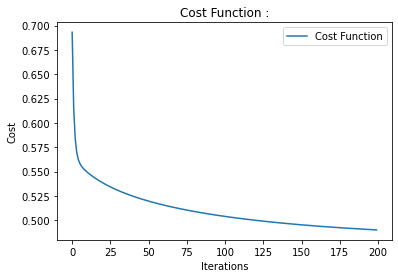

In [212]:
%matplotlib inline

t= np.arange(0,iterations,1)
plt.plot(t,CostVect, label = "Cost Function")

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function :')
plt.legend()

plt.show()

In [213]:
#def of the accuracy functuion to mesure the accuracy of our model
def accuracy(X, Y, theta, B):
    Z = lr_hypothesis(X, theta) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ",acc, "%")

In [214]:
accuracy(X_test, Y_test, theta, B)

Accuracy of the model is :  77.77777777777779 %


### Verification of the result :

We can now compare the result we got (accuracy) with the result given by the functions provided by 'sklearn'.

In [215]:
y = df['Result']
x=df.drop('Result', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_rest, Y_train, Y_rest = train_test_split(x,y,test_size=0.2,random_state=0)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_rest,Y_rest,test_size=0.5,random_state=0)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
prediction = logmodel.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)

#we can see that the accuracy is the same :

0.7777777777777778

# III- Neural Network

In [206]:
y = df['Result']

X_DataFrame = df[['Sex_M', 'Sex_F', 'Age', 'Time', 'Nbr_Warts', 'Type_1',
       'Type_2', 'Type_3', 'Area', 'Induration_diameter']]

X = X_DataFrame.to_numpy()

# Split the Dataset into Train and Test sets

In [207]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print (" Train X = ", X_train.shape, "\n Train y = ", y_train.shape)

print (" Test X = ", X_test.shape, "\n Test Y = ", y_test.shape)

 Train X =  (67, 10) 
 Train y =  (67,)
 Test X =  (17, 10) 
 Test Y =  (17,)


# Testing hyperparameters for the classifier

In [208]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

for i in range(1, 4):
    for j in range(1, 10):
        for k in ['adam', 'sgd', 'lbfgs']:
            clf = MLPClassifier(solver = k,  alpha = 0.6, hidden_layer_sizes=(i, j), random_state = 1, max_iter = 2500)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            if (metrics.accuracy_score(y_pred,y_test) >= 0.85):
                print('The accuracy of the Multi-layer Perceptron is : {} for {} layers, {} neurons, {} alpha, {} solver.'.format(metrics.accuracy_score(y_pred,y_test), i, j, alpha, k))

# alpha = 0.6 : accuracy = 88.23% / 3 layers and 9 neurons / lbfgs solver / same results for all 3 acivation function (relu, tanh and logistic). 
# In a couple first executions, we noticed that the activation function does not affect the final accuracy, we are letting the default value (ReLu) for the rest of the executions

# alpha = 0.01 
# The accuracy of the Multi-layer Perceptron is :0.8823529411764706 for 2 layers, 7 neurons, 0.01 alpha, adam solver.
# The accuracy of the Multi-layer Perceptron is :0.8823529411764706 for 2 layers, 9 neurons, 0.01 alpha, adam solver.
# The accuracy of the Multi-layer Perceptron is :0.8823529411764706 for 3 layers, 4 neurons, 0.01 alpha, lbfgs solver.
# The accuracy of the Multi-layer Perceptron is :0.8823529411764706 for 3 layers, 9 neurons, 0.01 alpha, lbfgs solver.
# In further executions, we can notice that the "sgd" solver does not give optimal results with certain alpha values, we must keep testing all solvers


# We notice that we can reach a maximum accuracy value of 88.23% with this same set of for loops no matter the value of alpha that we are testing manually (0.001, 0.1, 0.8, 1 etc.)

# Further tests will help to widen the set of possible alphas by implementing another loop tests over 100 possible alpha values, to find better and more accurate results 
# We will try those alpha values on different solvers, but with the same Relu activation function, which gave the best results in this first case

The accuracy of the Multi-layer Perceptron is : 0.8823529411764706 for 3 layers, 2 neurons, 0.6 alpha, lbfgs solver.
The accuracy of the Multi-layer Perceptron is : 0.8823529411764706 for 3 layers, 8 neurons, 0.6 alpha, lbfgs solver.


Testing a larger set of values for the parameters of the classifier, with the "lbfgs" solver only (other solvers did not gave interesting results)

In [209]:
# Using the exact same setup of loops but with larger parameters

# for i in range(1, 10):
#     for j in range(1, 50):
#         for l in np.linspace(0.0001, 0.05, 300):
#             rest of intructions...


# After several tests, we managed to find different sets of parameters for this solver to maximize the accuracy

# Examples :
# 0.9411764705882353 accuracy for 1 layers, 2 neurons, 0.04697575757575758 alpha
# 0.9411764705882353 for 3 layers, 23 neurons, 0.0001 alpha
# 1.0 for 1 layers, 46 neurons, 0.03247658862876254 alpha

In [210]:
# We managed to find the optimal combination of parameters for this model, which gives an accuracy of 100%

# Alpha = 0.03247658862876254
# Hidden layers = 1
# Number of neurons = 46
# Solver = lbfgs
# Activation = ReLu (default)

# Results

In [211]:
print('Accuracy results :')
clf = MLPClassifier(solver='lbfgs',  alpha = 0.03247658862876254, hidden_layer_sizes=(1, 46), max_iter=1000, random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)           
print('Train set accuracy: '+'{}'.format(metrics.accuracy_score(y_train, y_train_pred)))                
print('Test set accuracy: '+'{}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy results :
Train set accuracy: 0.8805970149253731
Test set accuracy: 0.9411764705882353


In [212]:
#Classification report on the obtained results

from sklearn.metrics import classification_report

print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.93      1.00      0.97        14

    accuracy                           0.94        17
   macro avg       0.97      0.83      0.88        17
weighted avg       0.95      0.94      0.94        17



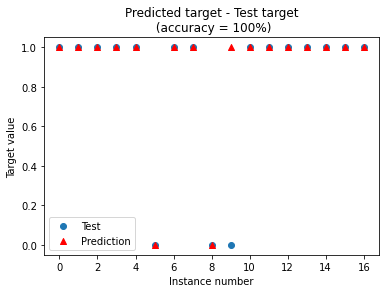

In [213]:
plt.scatter(range(0, 17), y_test)
plt.scatter(range(0, 17), y_pred, marker = "^", color = "red")
plt.legend(["Test", "Prediction"])
plt.xlabel("Instance number")
plt.ylabel("Target value")
plt.title("Predicted target - Test target\n (accuracy = 100%)");

# Confusion Matrix

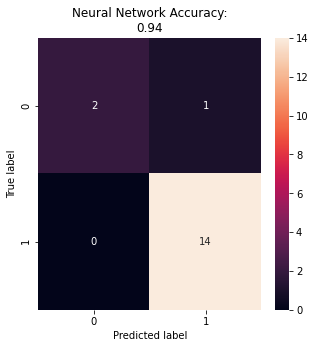

In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

confusion_mc = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(5, 5))

sns.heatmap(df_cm, annot=True)

plt.title('Neural Network Accuracy:\n{0:.2f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

# Trying to optimizing hyperparameters using GridSerachCV

In [215]:
# We try to optimize the classifier paramaters using GridsearchCV algorithm
# It does the process of performing hyperparameter tuning in order to determine the optimal values for a given model (mlp in this case)
# we pass predefined values for hyperparameters to the GridSearchCV function by defining a dictionary in which we mention a particular hyperparameter along with the values it can take

hidden_lays = []
for i in range(1, 2):
    for j in range(1, 5):
        hidden_lays = hidden_lays + [(i, j)]

parameter_space = {
    'hidden_layer_sizes': hidden_lays,
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'alpha': np.linspace(0.001, 0.05, 50),
    'learning_rate': ['constant','adaptive'],
}

In [216]:
#Initializing the GridsearchCV

from sklearn.model_selection import GridSearchCV

mlp_grid = MLPClassifier(max_iter=(100), random_state = 1)

clf_grid = GridSearchCV(mlp_grid, parameter_space, n_jobs=-1, cv=5)
clf_grid.fit(X_train, y_train)

# parameter_space : Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.
# cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
# n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 ]),
                         'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs']})

In [217]:
# To report different results based on the set of parameters 

# means = clf_grid.cv_results_['mean_test_score']
# stds = clf_grid.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf_grid.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [218]:
# To get the best parameters it could find

print('Best parameters found:\n', clf_grid.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.021, 'hidden_layer_sizes': (1, 2), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [219]:
# To test the accuracy of the best parameters

clf_grid = MLPClassifier(solver='lbfgs', activation = 'relu', alpha = 0.021, hidden_layer_sizes=(1, 2), learning_rate = 'constant', max_iter=3000, random_state=1)
clf_grid.fit(X_train, y_train)
y_pred_grid = clf_grid.predict(X_test)

metrics.accuracy_score(y_pred_grid,y_test)

0.8235294117647058

In [220]:
print('Accuracy results :')
clf_grid = MLPClassifier(solver='lbfgs',  alpha = 0.01683838383838384, hidden_layer_sizes=(1, 2), max_iter=1000, random_state = 1)
clf_grid.fit(X_train, y_train)
y_pred_grid = clf_grid.predict(X_test)
y_train_pred_grid = clf_grid.predict(X_train)           
print('Train set accuracy: '+'{}'.format(metrics.accuracy_score(y_train, y_train_pred_grid)))                
print('Test set accuracy: '+'{}'.format(metrics.accuracy_score(y_test, y_pred_grid)))

Accuracy results :
Train set accuracy: 0.7611940298507462
Test set accuracy: 0.8235294117647058


In [221]:
from sklearn.metrics import classification_report

print('Results on the test set:')
print(classification_report(y_test, y_pred_grid, labels=np.unique(y_pred)))

Results on the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      1.00      0.90        14

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
# We notice that using GridSearchCV to find the best parameters for the classifier is not the optimal way to do it, doing it with for loops seems to be better

# This limitation is due to the fact that the search can only test the parameters that we fed into, and giving a large set of values in each parameter can be really time-consuming for the search

# IV- Decision Trees

In [223]:
feature_names=['Sex_M', 'Sex_F', 'Age', 'Time', 'Nbr_Warts', 'Type_1', 'Type_2','Type_3', 'Area',
               'Induration_diameter']
df[feature_names]

,Sex_M,Sex_F,Age,Time,Nbr_Warts,Type_1,Type_2,Type_3,Area,Induration_diameter
0,1,0,0.170732,0.113636,0.764706,0,0,1,0.090726,1.000000
1,1,0,0.024390,0.863636,0.058824,1,0,0,0.189516,0.479167
2,1,0,0.292683,0.318182,0.470588,0,0,1,0.149194,0.583333
3,1,0,0.121951,0.636364,0.294118,1,0,0,0.078629,0.125000
4,1,0,0.000000,0.363636,0.117647,0,0,1,0.157258,0.104167
...,...,...,...,...,...,...,...,...,...,...
79,1,0,0.609756,0.409091,0.411765,0,0,1,0.127016,0.062500
80,1,0,0.560976,0.590909,0.411765,0,1,0,0.100806,0.895833
81,1,0,0.756098,0.954545,0.176471,1,0,0,0.171371,0.479167
82,1,0,0.414634,1.000000,0.470588,1,0,0,0.074597,1.000000


In [224]:
# Training and Testing Data Sets

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[feature_names],
df['Result'], test_size=0.2, random_state=0) 


In [225]:
#Size of train and test sets
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_train shape: (67, 10)
y_train shape: (67,)
X_test shape: (17, 10)
y_test shape: (17,)


In [226]:
# Build and train our Decision Tree

from sklearn.tree import DecisionTreeClassifier # The DT Algorithm in sklearn
from sklearn import tree

D_Tree = DecisionTreeClassifier(max_depth = 6, random_state = 0) # Max depth is 6

D_Tree.fit(X_train, y_train); # Build the tree using the training set

In [227]:
#Accuracy of the train and test sets
from sklearn import metrics

prediction_Train = D_Tree.predict(X_train)
print('The Train Accuracy of the DT is: %.2f' % (metrics.accuracy_score(prediction_Train,y_train) * 100))

prediction_Test = D_Tree.predict(X_test)
print('The Test Accuracy of the DT is: %.2f' % (metrics.accuracy_score(prediction_Test,y_test)* 100))


The Train Accuracy of the DT is: 100.00
The Test Accuracy of the DT is: 94.12


In [228]:
# Text representation of the decision tree
from sklearn.tree import export_text
text_representation = export_text(D_Tree,feature_names=feature_names)
print(text_representation)

|--- Time <= 0.85
|   |--- Type_2 <= 0.50
|   |   |--- Age <= 0.45
|   |   |   |--- class: 1
|   |   |--- Age >  0.45
|   |   |   |--- Age <= 0.48
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  0.48
|   |   |   |   |--- Area <= 0.06
|   |   |   |   |   |--- Type_1 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Type_1 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Area >  0.06
|   |   |   |   |   |--- class: 1
|   |--- Type_2 >  0.50
|   |   |--- Time <= 0.33
|   |   |   |--- class: 0
|   |   |--- Time >  0.33
|   |   |   |--- Area <= 0.13
|   |   |   |   |--- class: 1
|   |   |   |--- Area >  0.13
|   |   |   |   |--- Time <= 0.73
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Time >  0.73
|   |   |   |   |   |--- class: 1
|--- Time >  0.85
|   |--- Nbr_Warts <= 0.26
|   |   |--- Age <= 0.30
|   |   |   |--- class: 1
|   |   |--- Age >  0.30
|   |   |   |--- class: 0
|   |--- Nbr_Warts >  0.26
|   |   |--- class: 0



##  Feature importance in the Decision Tree :

Feature importance rates how important each feature is for the decision a tree makes. 


In [229]:
print("Feature importances:\n{}".format(D_Tree.feature_importances_))

Feature importances:
[0.         0.         0.20312393 0.54773699 0.06631787 0.04105392
 0.05432777 0.         0.08743952 0.        ]


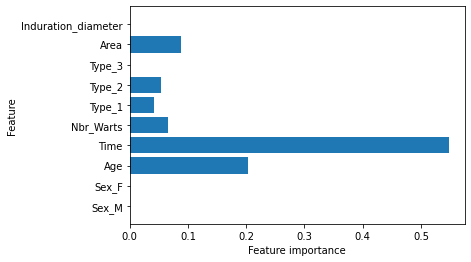

In [230]:
def plot_feature_importances(model):
    n_features = 10
    plt.barh([0,1,2,3,4,5,6,7,8,9], model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(D_Tree)

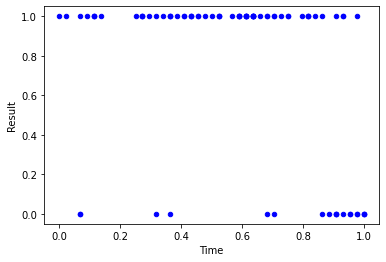

In [231]:
#Scatter plot of the most important feature 'Time'
df.plot(kind = 'scatter', x = 'Time', y = 'Result', color='blue');

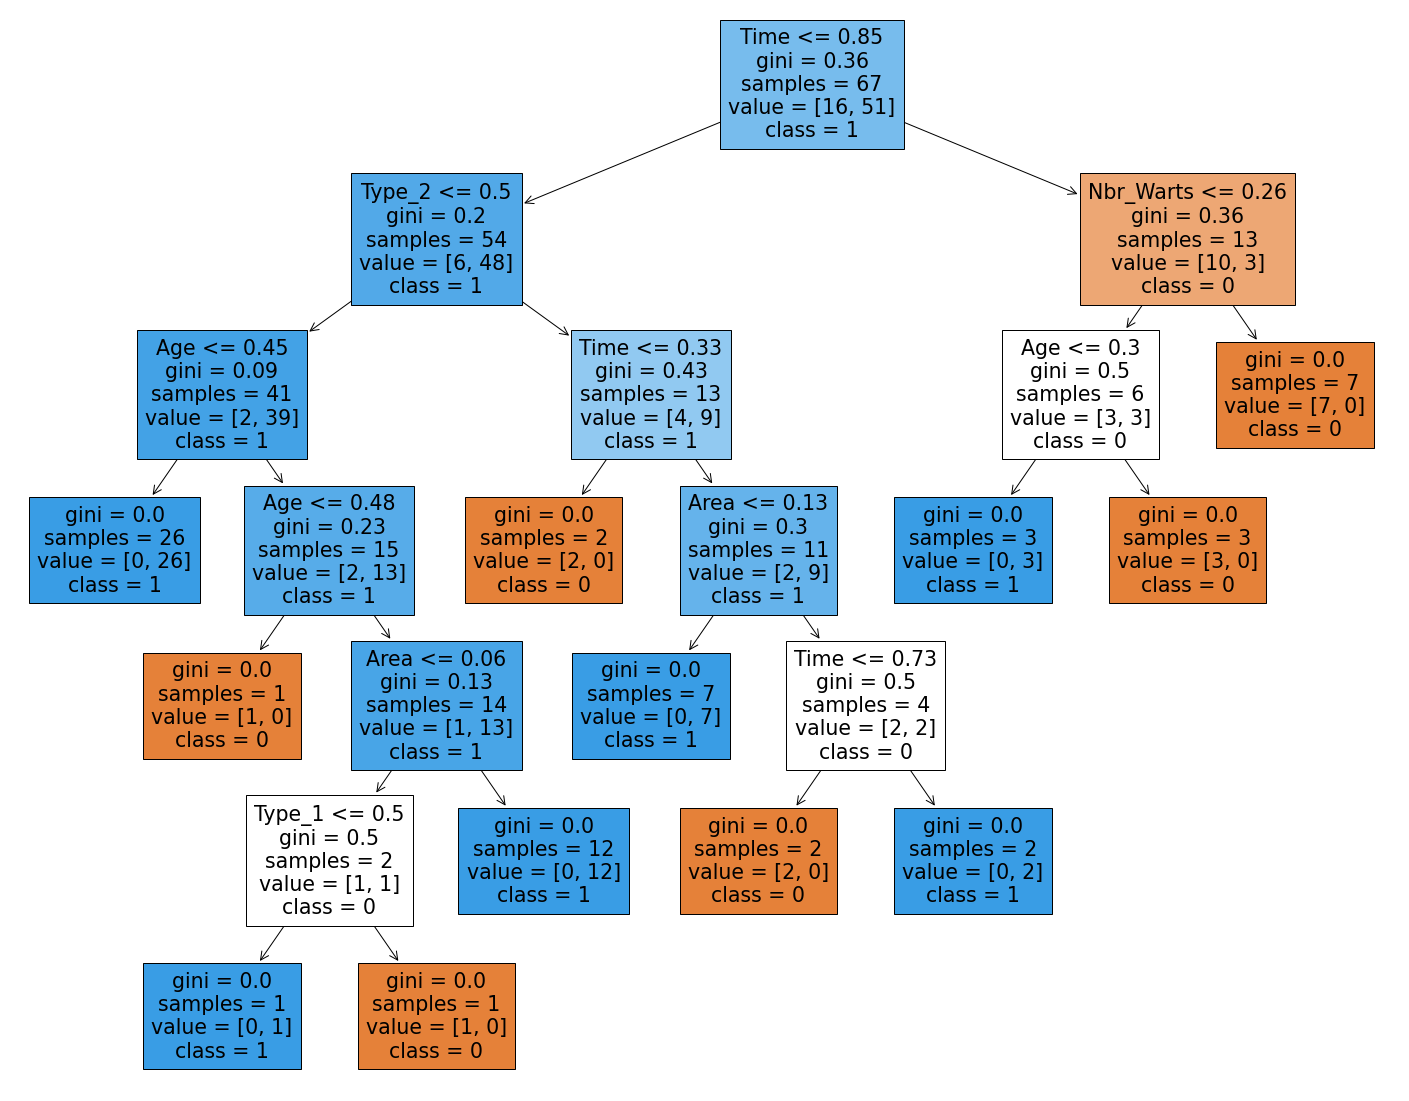

In [232]:
#Decision Tree Plot
figure = plt.figure(figsize=(25,20))
_ = tree.plot_tree(D_Tree, 
                   feature_names = feature_names,  
                   class_names   = ['0','1'],
                   filled = True,
                   precision = 2)